<a href="https://colab.research.google.com/github/Mobodot/Ineuron_DL_assignments/blob/main/Fashion_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Performing classifications on Fashion mnist data
This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

*Label* --------> **Description**

0 ==> T-shirt/top

1 ==> Trouser

2 ==>	Pullover

3 ==>	Dress

4 ==>	Coat

5 ==>	Sandal

6 ==>	Shirt

7 ==>	Sneaker

8 ==>	Bag

9 ==>	Ankle boot

In [188]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [60]:
!pip install keras-tuner -q


     |████████████████████████████████| 135 kB 14.0 MB/s 
     |████████████████████████████████| 1.6 MB 47.0 MB/s 


In [5]:
dataset=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [100]:
(x_train, y_train), (x_test, y_test) = dataset

In [101]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [102]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

## Viewing what the data looks like visually

In [103]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

(-0.5, 27.5, 27.5, -0.5)

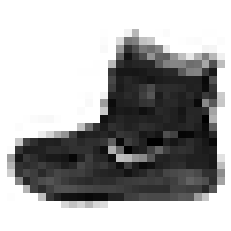

In [104]:
plt.imshow(x_train[0], cmap="binary")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

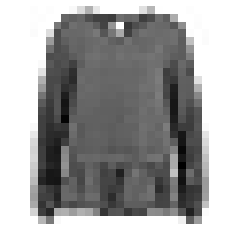

In [26]:
plt.imshow(x_train[18], cmap="binary")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

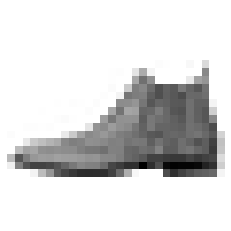

In [28]:
plt.imshow(x_test[0], cmap="binary")
plt.axis("off")

### Scaling the dataset

In [105]:
x_train = x_train/255
# y_train = y_train

# x_valid, x_train = x_train[:5000]/255, x_train[5000:]/255
# y_valid, y_train = y_train[:5000], y_train[5000:]


x_test = x_test/255

In [106]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [107]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Tuning the model

In [168]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


In [148]:
import keras_tuner
from tensorflow import keras


def build_model(hp):
    model = keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(
            tf.keras.layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu"]),
            )
        ),
        model.add(tf.keras.layers.Dropout(rate=0.20))

    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    learning_rate = hp.Choice("lr", [1e-2, 1e-3])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [155]:
tuner = keras_tuner.Hyperband(
    hypermodel=build_model,
    max_epochs=10,
    objective="val_loss",
    factor=3,
    directory="fashion_mnist1",
    project_name="tuner_models"
)

In [156]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'], 'ordered': False}
lr (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001], 'ordered': True}


In [157]:
tuner.search(x_train, y_train, 
             validation_split=.2,
            #  validation_data=(x_valid,y_valid), 
             epochs=20)

Trial 30 Complete [00h 01m 23s]
val_loss: 0.3488340973854065

Best val_loss So Far: 0.30380508303642273
Total elapsed time: 00h 19m 38s


In [159]:
models = tuner.get_best_models(num_models=2)
best_model1, best_model2 = models[0], models[1]
best_model1.build(input_shape=[28,28])
best_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 384)               301440    
                                                                 
 dropout (Dropout)           (None, 384)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                3850      
                                                                 
Total params: 305,290
Trainable params: 305,290
Non-trainable params: 0
_________________________________________________________________


In [160]:
best_model2.build(input_shape=[28,28])
best_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 288)               226080    
                                                                 
 dropout (Dropout)           (None, 288)               0         
                                                                 
 dense_1 (Dense)             (None, 96)                27744     
                                                                 
 dropout_1 (Dropout)         (None, 96)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                970       
                                                                 
Total params: 254,794
Trainable params: 254,794
Non-trai

In [163]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units_0': 384,
 'activation': 'relu',
 'lr': 0.001,
 'units_1': 96,
 'units_2': 480,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [167]:
print("Best parameters")
for p in ["units_1", "units_2", "lr", "activation"]:
  print(f"{p, tuner.get_best_hyperparameters()[0].get(p)}")
# tuner.get_best_hyperparameters()[1]

Best parameters
('units_1', 96)
('units_2', 480)
('lr', 0.001)
('activation', 'relu')


In [170]:
tuner.results_summary(num_trials=3)

Results summary
Results in fashion_mnist1/tuner_models
Showing 3 best trials
Trial summary
Hyperparameters:
num_layers: 1
units_0: 384
activation: relu
lr: 0.001
units_1: 96
units_2: 480
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.30380508303642273
Trial summary
Hyperparameters:
num_layers: 2
units_0: 288
activation: relu
lr: 0.001
units_1: 96
units_2: 384
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.3127918839454651
Trial summary
Hyperparameters:
num_layers: 2
units_0: 448
activation: relu
lr: 0.001
units_1: 480
units_2: 192
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.317522257566452


In [172]:
history = best_model1.fit(x_train, y_train, validation_split=.2,
                    epochs=50, callbacks=stop_early)

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2588 - accuracy: 0.9031 - val_loss: 0.3246 - val_accuracy: 0.8865
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2520 - accuracy: 0.9051 - val_loss: 0.3168 - val_accuracy: 0.8919
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2459 - accuracy: 0.9067 - val_loss: 0.3112 - val_accuracy: 0.8937
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2385 - accuracy: 0.9105 - val_loss: 0.3125 - val_accuracy: 0.8946
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2370 - accuracy: 0.9110 - val_loss: 0.3147 - val_accuracy: 0.8948
Epoch 6/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2289 - accuracy: 0.9126 - val_loss: 0.3224 - val_accuracy: 0.8923
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2234 - accuracy: 0.9157 - val_loss: 0.3159 - val_accurac

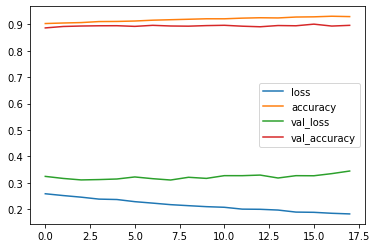

In [173]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [144]:
best_model1.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8075 - accuracy: 0.8803


[0.8074566125869751, 0.880299985408783]

### Evaluating the 2nd best tuned model

In [174]:
history2 = best_model2.fit(x_train, y_train, validation_split=.2,
                    epochs=50, callbacks=stop_early)

Epoch 1/50
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2981 - accuracy: 0.8889 - val_loss: 0.3217 - val_accuracy: 0.8832
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2863 - accuracy: 0.8944 - val_loss: 0.3263 - val_accuracy: 0.8807
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2873 - accuracy: 0.8926 - val_loss: 0.3281 - val_accuracy: 0.8808
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2783 - accuracy: 0.8971 - val_loss: 0.3276 - val_accuracy: 0.8870
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2715 - accuracy: 0.8983 - val_loss: 0.3352 - val_accuracy: 0.8814
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2714 - accuracy: 0.8981 - val_loss: 0.3103 - val_accuracy: 0.8892
Epoch 7/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2635 - accuracy: 0.9017 - val_loss: 0.3196 - val_accuracy:

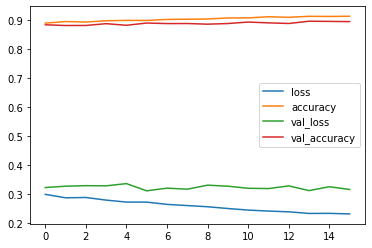

In [175]:
pd.DataFrame(history2.history).plot()

In [176]:
best_model2.evaluate(x_train, y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2070 - accuracy: 0.9233


[0.2070145606994629, 0.9232500195503235]

## Making predictions with both models

Just to see visually we will see if the model is able to classify correctly the first image in the test set.

In [220]:
## Model 1

def predictions(x, y, model):
  y_prob = model.predict(x)
  y_pred = np.argmax(y_prob, axis=1)

  for data, actual, pred in zip(x, y, y_pred):
    # print(data)
    plt.imshow(data, cmap="binary")
    plt.title(f"actual_class: {actual}, predicted_class: {pred}")
    plt.axis("off")
    plt.show()
    print("\n")

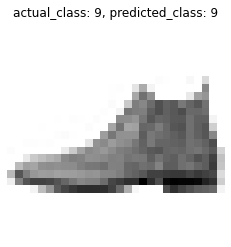

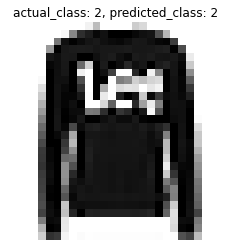

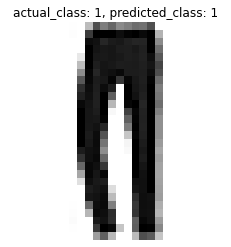

In [221]:
predictions(x_test[:3], y_test[:3], best_model1)

In [224]:
## Model 2

def predictions(x, y, model):
  y_prob = model.predict(x)
  y_pred = np.argmax(y_prob, axis=1)

  for data, actual, pred in zip(x, y, y_pred):
    # print(data)
    plt.imshow(data, cmap="binary")
    plt.title(f"actual_class: {actual}, predicted_class: {pred}")
    plt.axis("off")
    plt.show()
    print("\n")

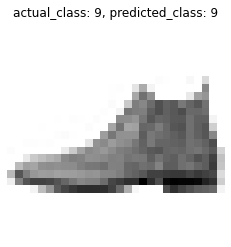

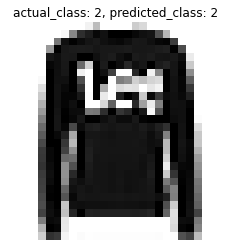

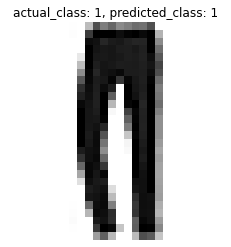

In [225]:
predictions(x_test[:3], y_test[:3], best_model2)


**NB:** We see that both models are actually making correct preditions but model2 is better with an accuracy of *92%*, while model1 has an accuracy of *88%*.